# Exercises for Introduction to Quantum Computing

Name: Pugazharasu Anancia Devaneyan (s6puanan) <br />
Matriculation number: 3300280

## 1. Iterative Phase Estimation (IPE)

a) 

b)

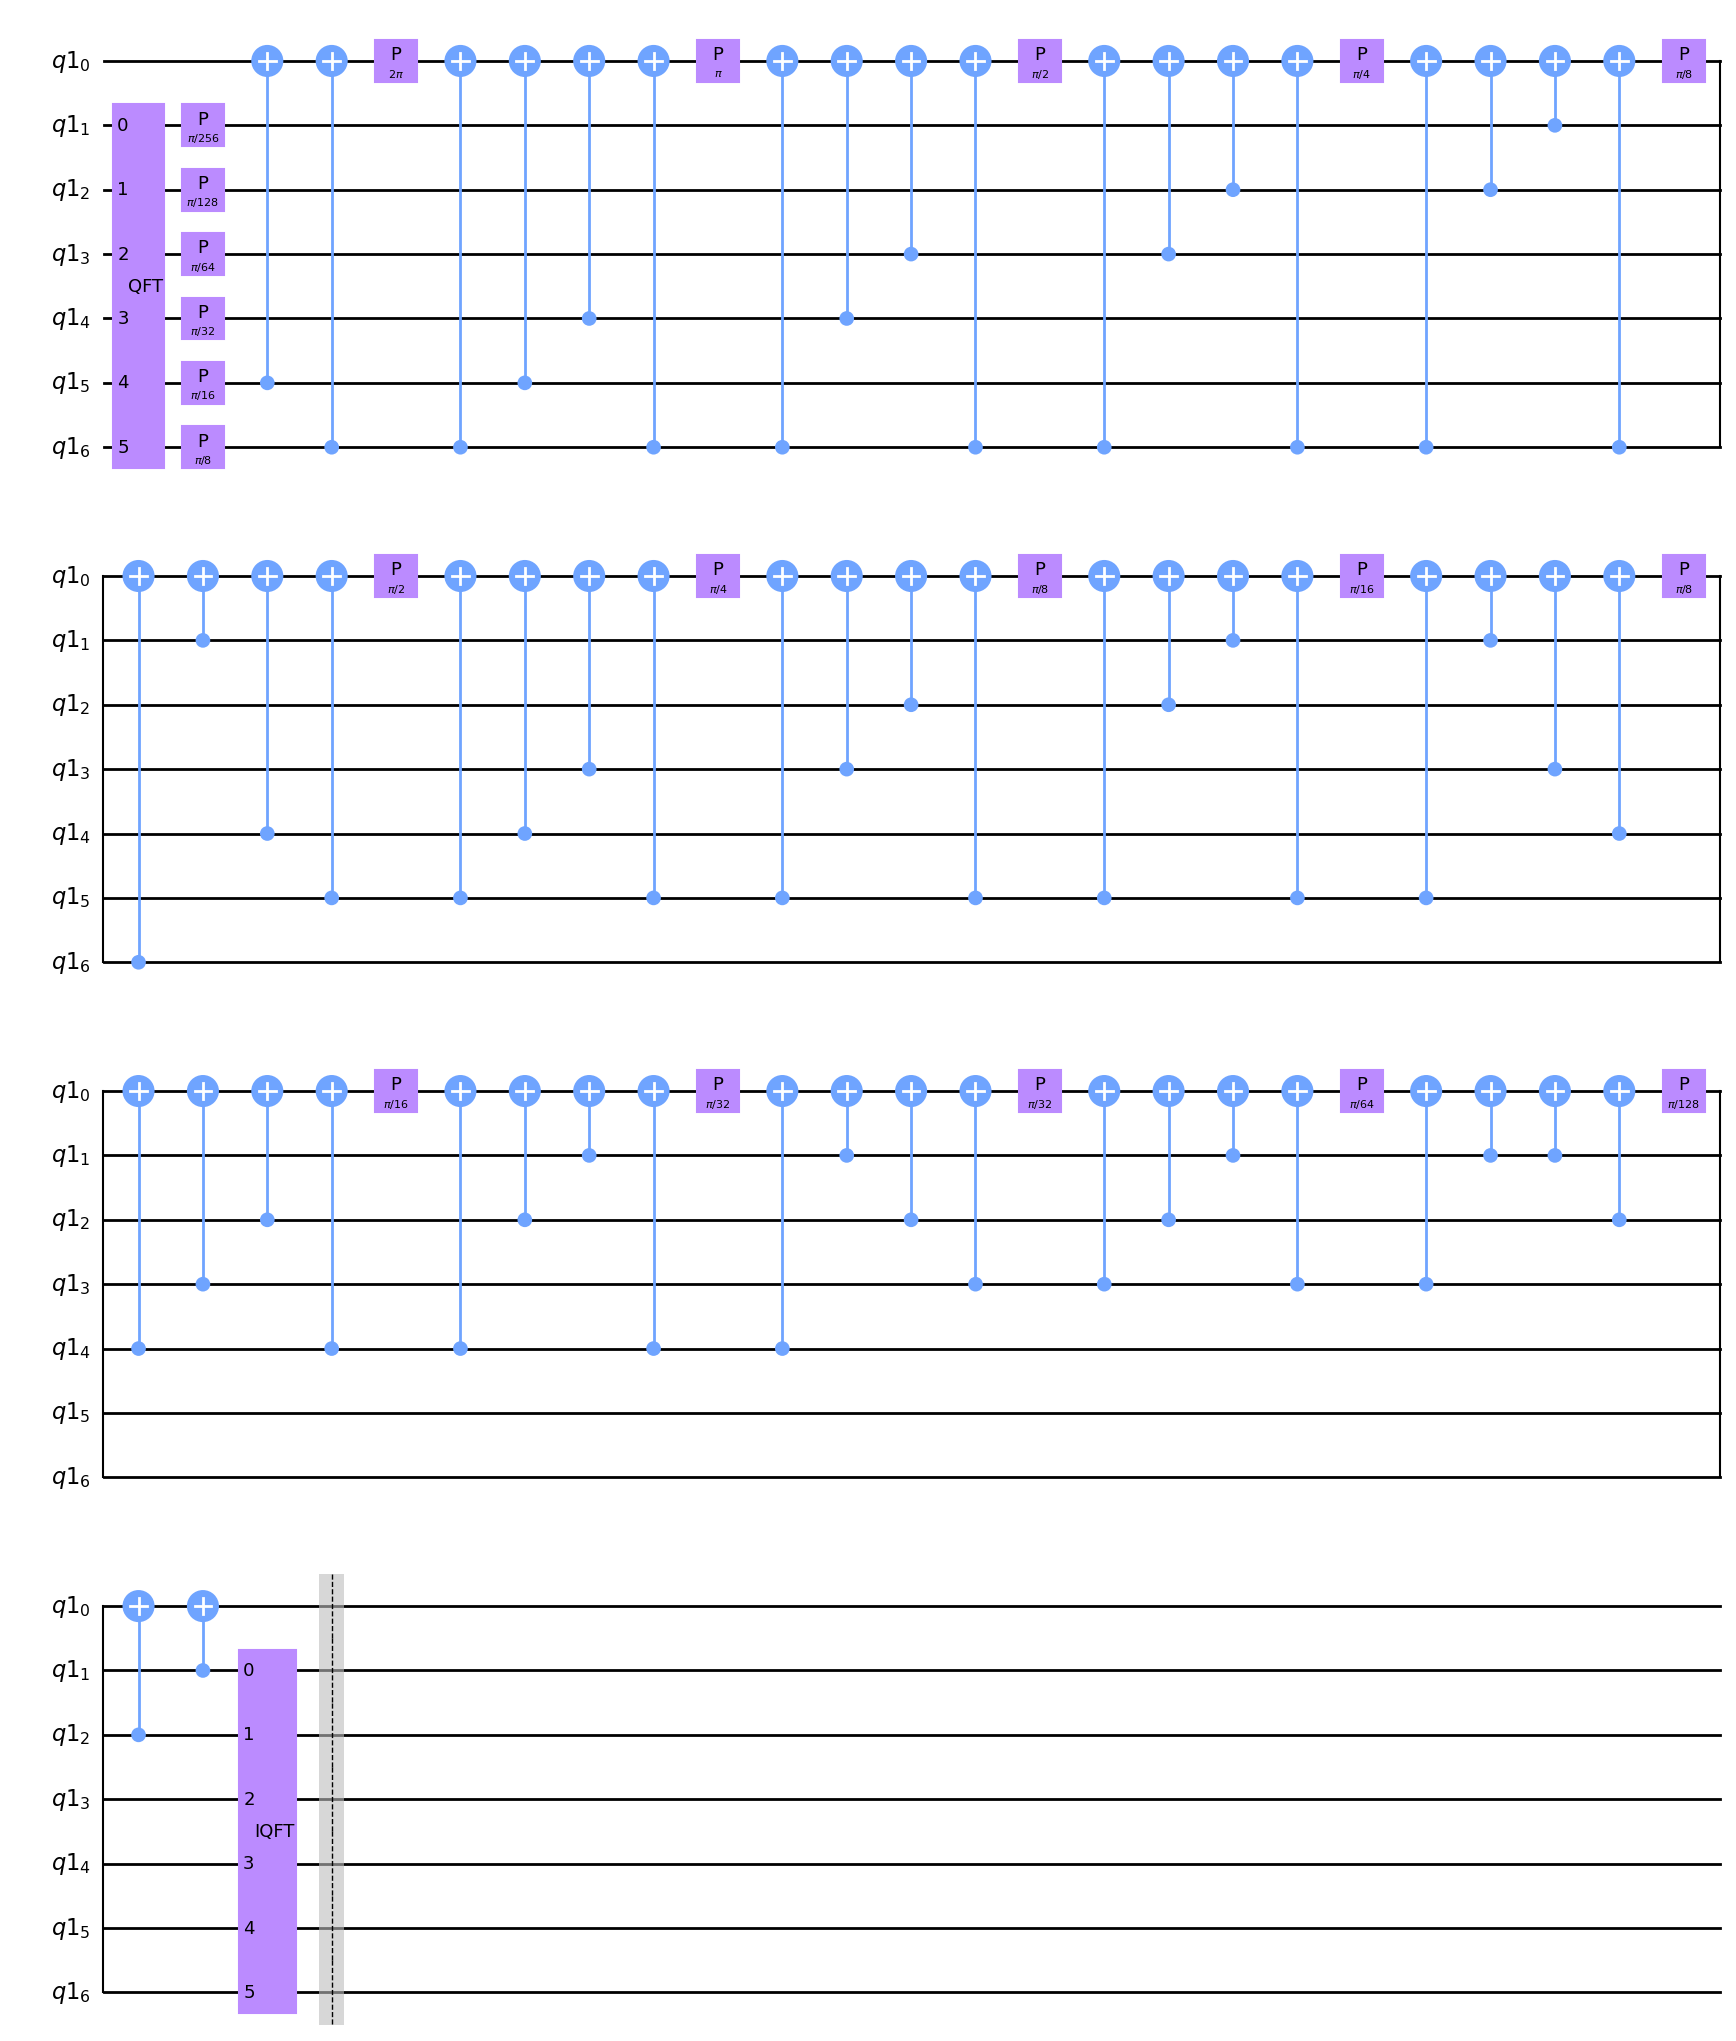

In [8]:
n=6
phi=np.pi
qubits=QuantumRegister(n+1)
splitOp=QuantumCircuit(qubits,name="splitOp")

'''QFT'''
splitOp.append(QFT(6),qubits[1:])

'''momentum operator'''
for i in range(n):
    splitOp.p(phi/2**(n-3+i), n-i)
for i in range(n):
    for j in range(i+1,n):
        splitOp.cx(n-j,0)
        splitOp.cx(n-i,0)
        splitOp.p(phi*(2**(2-i-j)),0)
        splitOp.cx(n-i,0)
        splitOp.cx(n-j,0)
'''inverse QFT'''
splitOp.append(QFT(n,inverse=True),qubits[1:]) #inverse QFT
splitOp.barrier()
splitOp.draw('mpl')

c)

In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np
#from qiskit.circuit.library import NormalDistribution
from math import pi
from qiskit import IBMQ, BasicAer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
from scipy import signal

In [3]:
#Defining the wavefunction whose probability distribution takes the form of a Delta distribution
length = 2**6

psi = signal.unit_impulse(length,length//2)
psi 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

We can see that this indeed implements a Delta function by plotting it,

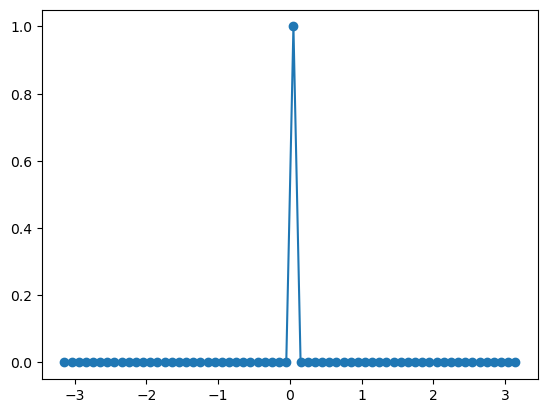

In [6]:
x = np.linspace(-np.pi,np.pi,2**6)
plt.scatter(x, psi)
plt.plot(x, psi)

In [9]:

n=6

q=QuantumRegister(n+1)
c=ClassicalRegister(n)
circuit=QuantumCircuit(q,c)
'''initialization'''
circuit.initialize(psi,q[1:])
circuit.barrier()
'''time steps'''
iterations=2
for i in range(iterations):
     circuit.append(splitOp,q[:])
'''measurement'''
for i in range(1,n+1):
    circuit.measure(i,i-1)
circuit.draw('mpl')
answer = execute(circuit, backend=BasicAer.get_backend('qasm_simulator'), shots=500000).result().get_counts()


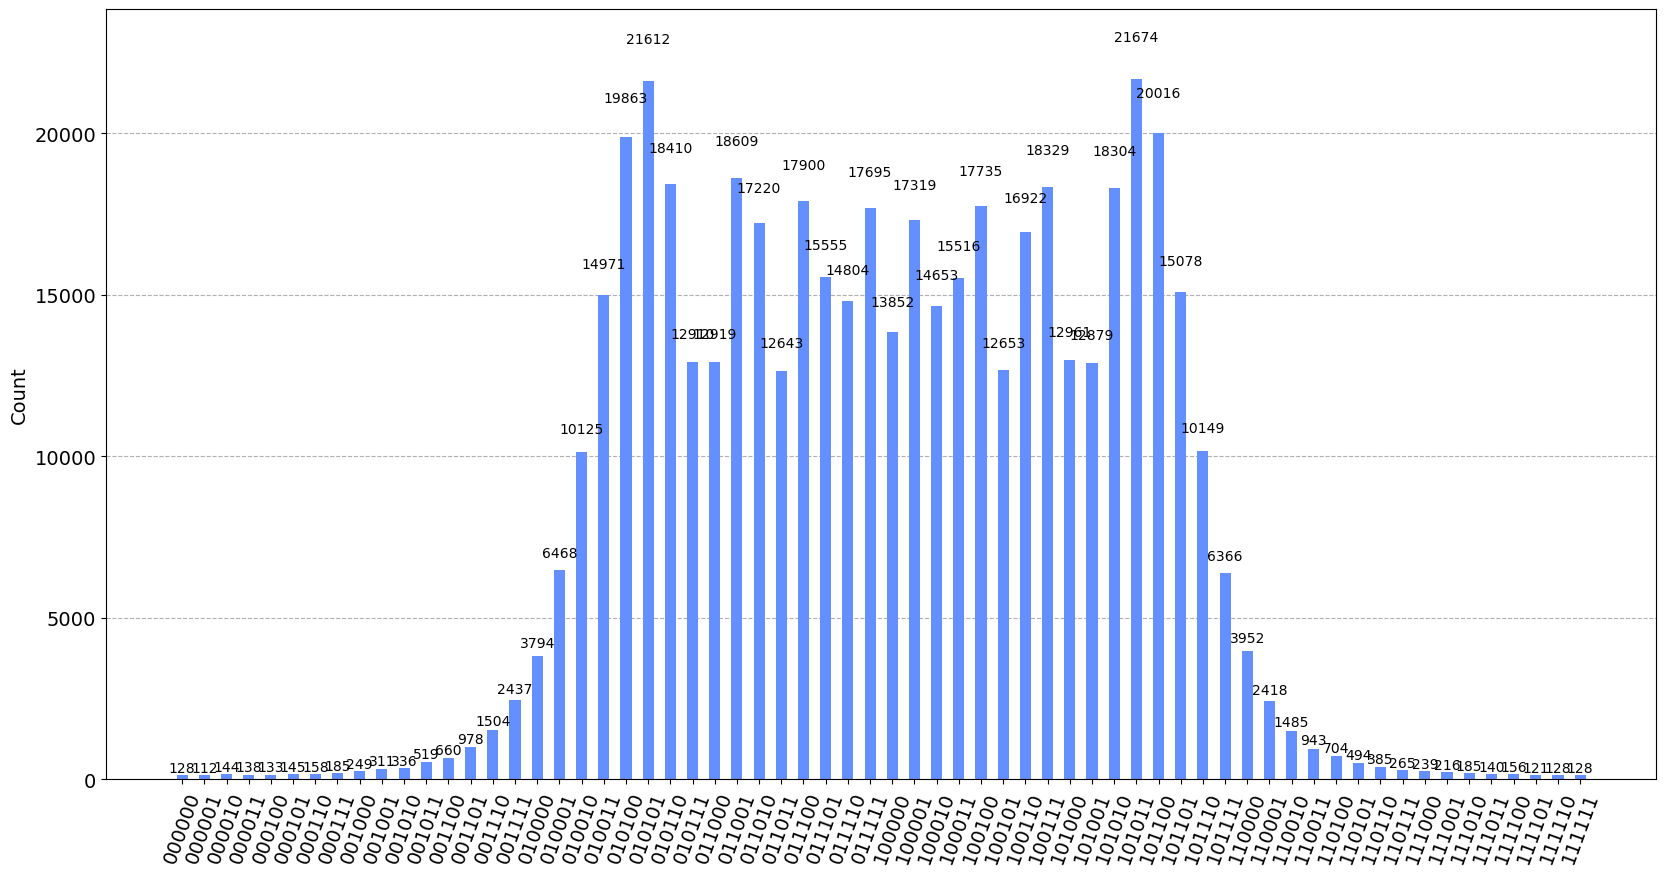

In [10]:
N=4
for a in range(N):
  s = bin(a)[2:]
  while len(s)!=6:
    s='0'+s
  if s not in answer.keys():
    answer[s] = 0
plot_histogram(answer, figsize = [20,10])